<a href="https://colab.research.google.com/github/vinayakrajurs/Sample-Convolution-Interaction-Syntheic-Data/blob/main/SCINet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Synthetic Data Generation using Resilient Sample Convolution and Interactive Learning Approach**

### **1. Mounting Drive**

1. Download the zip code from github

2. Upload the downloaded file to your drive and open the file using Zip extractor

3. Extract all the files in the drive

4. Mount the Drive by running the cell and copy-pasting the code and press Enter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **2. Changing Directory path**

###### **Steps To Follow**

1. Once the drive has been mounted, go to the folder icon visible on the left hand side.

2. Click on the drive folder.

3. There find the folder containing the run_main_SCINet.py file.

4. Right click on the folder and click on the folder and select the copy path option.

5. Make sure to copy and paste the path of the folder containing the run_ETTh_10.py file in the code below. 

6. Paste the file path after %cd

In [ ]:
%cd /content/drive/MyDrive/SCINET
!ls

/content/drive/MyDrive/SCINET
data	      data_process  exp		 models		 utils
data_old.pkl  datasets	    experiments  out.pkl
data.pkl      event	    metrics	 run_ETTh_10.py


### **3. Running the Main code**

1. All changes to the Prediction Length, epochs, dataset, etc can be made in the run_main_SCINet.py file
2. Insertion of a new dataset must be done in the datasets folder as well as adding it in the dataparser in the run_main_SCINet.py file.
3. You may make changes in the dataset used in run_main_SCINet.py and target to be run
4. In run_main_SCINet.py L51, Must be set to True inorder to form the test results after training
5. In Experiments folder exp_ETTh.py file's L284 must also be set for True apply the model for Test data

In [ ]:
!python run_main_SCINet.py --data dataset4 --features S  --seq_len 48 --label_len 24 --pred_len 48 --hidden-size 4 --stacks 1 --levels 3 --lr 0.005 --batch_size 32 --dropout 0.5 --model_name mendeley_S_I48_O24_lr7e-3_bs16_dp0.25_h8_s1l3

Args in experiment:
Namespace(INN=1, RIN=False, batch_size=32, checkpoints='exp/ETT_checkpoints/', cols=None, concat_len=0, data='dataset4', data_path='trial.csv', detail_freq='s', devices='0', dilation=1, dropout=0.5, embed='timeF', evaluate=False, features='S', freq='s', gpu=0, groups=1, hidden_size=4.0, inverse=True, itr=0, kernel=5, label_len=24, lastWeight=1.0, levels=3, loss='mae', lr=0.005, lradj=1, model='SCINet', model_name='mendeley_S_I48_O24_lr7e-3_bs16_dp0.25_h8_s1l3', num_decoder_layer=1, num_workers=0, patience=5, positionalEcoding=False, pred_len=48, resume=False, root_path='./datasets/', save=False, seq_len=48, single_step=0, single_step_output_One=0, stacks=1, target='Current', train_epochs=6, use_amp=False, use_gpu=True, use_multi_gpu=False, window_size=12)
SCINet(
  (blocks1): EncoderTree(
    (SCINet_Tree): SCINet_Tree(
      (workingblock): LevelSCINet(
        (interact): InteractorLevel(
          (level): Interactor(
            (split): Splitting()
            

### **4. Results**

##### **Changing Directory path**

1. Once the code is run, a results folder will be created in the same folder which contains run_main_SCINet.py file.

2. Copy the path of the folders and paste it in the code below.
             
3. %cd /content/drive/MyDrive/SCINET/exp/ett_results/SCINet_dataset4_ftS_sl48_ll24_pl24_lr0.005_bs32_hid4.0_s1_l3_dp0.5_invTrue_itr01

4. The folder addres in which the result is stored will be printed while running the run_main_SCINet.py code in the cell above


In [ ]:
%cd /content/drive/MyDrive/SCINET/exp/ett_results/SCINet_dataset4_ftS_sl48_ll24_pl24_lr0.005_bs32_hid4.0_s1_l3_dp0.5_invTrue_itr0
!ls

/content/drive/MyDrive/SCINET/exp/ett_results/SCINet_dataset4_ftS_sl48_ll24_pl24_lr0.005_bs32_hid4.0_s1_l3_dp0.5_invTrue_itr0
metrics.npy
pred.npy
pred_scales.npy
SCINet_dataset4_Charge_Capacity_pred_len_24.pdf
SCINet_dataset4_Current_pred_len_24.pdf
SCINet_dataset4_Voltage_pred_len_24_6_epoch.pdf
SCINet_dataset4_Voltage_pred_len_24.pdf
SCINet_mendeley_Charge_Capacity_pred_len_24.pdf
SCINet_mendeley_Current_pred_len_24.pdf
SCINet_mendeley_Voltage_pred_len_24.pdf
SCINet_trails_Current_pred_len_24.pdf
SCINet_trails_Voltage_pred_len_24.pdf
true.npy
true_scales.npy


##### **4 a. True and Prediction values**

1. When we finished exp.train(setting) and exp.test(setting), we will get a trained model and the results of test experiment

2. The results of test experiment will be saved in ./content/drive/MyDrive/SCINET/exp/ett_results/SCINet_dataset4_ftS_sl48_ll24_pl24_lr0.005_bs32_hid4.0_s1_l3_dp0.5_invTrue_itr0

In [ ]:
import numpy as np
preds = np.load('pred.npy')
trues = np.load('true.npy')
# [samples, pred_len, dimensions]
import matplotlib.pyplot as plt
import seaborn as sns

##### **4 b. Matplotlib to plot the results**

1. You can remove the # from .savefig and .download to save and download the plot in pdf format on your local PC 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

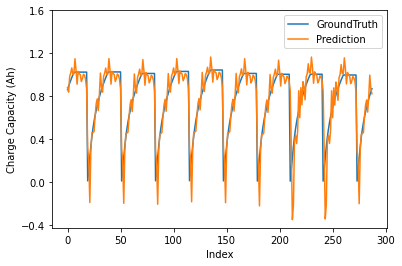

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot (trues[:,1,-1], label='GroundTruth')
plt.plot (preds[:,1,-1], label='Prediction')
plt.legend(loc='upper right');
plt.xlabel('Index')
plt.ylabel('Charge Capacity (Ah)')
plt.yticks(np.arange(-.4, 2, .4))
from google.colab import files
#plt.savefig('SCINet_trails_Charge_Capacity_pred_len_24.pdf')
#files.download('SCINet_trails_Charge_Capacity_pred_len_24.pdf')
plt.show()

END